<a href="https://colab.research.google.com/github/eriramirez/ProgFin/blob/main/004.1_session%20international%20portfolio%20optimization%202024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Optimization of an International Portfolio

In [1]:
! pip install cvxpy
! pip install riskfolio-lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.6/307.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstalling cvxpy-1.3.4:
      Successfully uninstalled cvxpy-1.3.4


In [2]:
# Download .csv file to colab instance
! wget https://raw.githubusercontent.com/eriramirez/ProgFin/main/ACTIVOS%20Actinver%20PAMA%20para%20python.csv

--2024-06-03 16:17:29--  https://raw.githubusercontent.com/eriramirez/ProgFin/main/ACTIVOS%20Actinver%20PAMA%20para%20python.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18347374 (17M) [text/plain]
Saving to: ‘ACTIVOS Actinver PAMA para python.csv’

ACTIVOS Actinver PA 100%[===================>]  17.50M  --.-KB/s    in 0.1s    

2024-06-03 16:17:29 (131 MB/s) - ‘ACTIVOS Actinver PAMA para python.csv’ saved [18347374/18347374]



In [3]:
import pandas as pd


In [11]:
pd.read_csv??

In [41]:
df = pd.read_csv ("ACTIVOS Actinver PAMA para python.csv")
# df["Date"] = pd.to_datetime(df["Date"], format='mixed', dayfirst=True).to_pydatetime()
df["Date"] = df["Date"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
df.index=df.Date
df

,Date,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094137,NaN
1962-01-03,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095535,NaN
1962-01-04,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095768,NaN
1962-01-05,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093671,NaN
1962-01-08,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,2024-05-09,14.48,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,2024-05-10,14.40,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,2024-05-13,14.93,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [42]:
# drop columns with no information
df = df.dropna(axis=1,how='all')
df

,Date,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094137,NaN
1962-01-03,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095535,NaN
1962-01-04,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095768,NaN
1962-01-05,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093671,NaN
1962-01-08,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,2024-05-09,14.48,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,2024-05-10,14.40,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,2024-05-13,14.93,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [43]:
# Drop old dates to analyze in Riskfolio
from datetime import datetime, timedelta
start = datetime(2019,1,1)
df = df[df["Date"]>start]
df

,Date,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,31.963156,37.793774,0.6980,57.578552,69.330475,NaN,34.519871,NaN,3.56200,...,NaN,28.534632,99.234459,17.778921,45.037312,21.587917,58.802830,77.852409,53.034836,NaN
2019-01-03,2019-01-03,29.581667,34.029240,0.6886,56.218712,67.046120,NaN,35.023525,NaN,3.54813,...,NaN,28.387894,98.274445,17.750107,44.590637,21.102589,55.835209,76.271599,52.220570,NaN
2019-01-04,2019-01-04,31.530163,35.481922,0.7088,58.071381,69.206161,NaN,34.868549,NaN,3.46932,...,NaN,28.565203,102.238121,19.536642,46.107796,21.803616,58.309818,78.546867,54.145927,NaN
2019-01-07,2019-01-07,32.425682,35.402943,0.6900,58.418186,70.216240,NaN,36.854126,NaN,3.55211,...,NaN,28.901482,104.053612,19.642302,46.793221,21.830576,58.831291,78.848412,54.427490,NaN
2019-01-08,2019-01-08,31.904114,36.077835,0.7300,58.573330,70.542557,NaN,37.047836,NaN,3.56833,...,NaN,29.103247,107.313904,19.882427,47.155178,21.848553,59.324310,79.460640,54.823215,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,2024-05-09,14.480000,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,2024-05-10,14.400000,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,2024-05-13,14.930000,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [44]:
# Import the necessary libraries
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from typing import Dict, List
import cvxpy as cp
import riskfolio as rp
import warnings

In [45]:
assets = ["AAL","AAPL","AAU", "WMT"]
Y = df[assets].pct_change().dropna()
display(Y.head())
#pct_change_df = data.pct_change()

,AAL,AAPL,AAU,WMT
Date,,,,
2019-01-03,-0.074507,-0.099607,-0.013467,-0.005142
2019-01-04,0.065868,0.042689,0.029335,0.006246
2019-01-07,0.028402,-0.002226,-0.026524,0.011772
2019-01-08,-0.016085,0.019063,0.057971,0.006981
2019-01-09,0.030845,0.016982,0.125342,-0.003256


In [46]:
# Building the portfolio object
port = rp.Portfolio(returns = Y)

#Calculating optimal portfolio

#Select method and estimate input parameters
method_mu = 'hist' # method to estimate expected returns based on historical data
method_cov = 'hist' # method to estimate covariance matrix based on historical data

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

#Estimate optimal portfolio
model = "Classic" # Could be Classic (historical), BL (Black Litterman), or FM (FActor Model)
rm = "MV" # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility of Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk Free Rate
l = 0 # Risk aversion factor, unly useful when objective is 'Utility'

w = port.optimization(model=model, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAL,AAPL,AAU,WMT
weights,5.371239e-10,0.624026,5.128163e-10,0.375974


array([<Axes: title={'center': 'Copyright (c) 2020-2024, Dany Cajas. All rights reserved.'}>,
       <Axes: title={'center': 'Historical Compounded Cumulative Returns'}>,
       <Axes: title={'center': 'Portfolio Composition'}>,
       <Axes: title={'center': 'Risk (Standard Deviation) Contribution per Asset'}>,
       <Axes: title={'center': 'Portfolio Returns Histogram'}, ylabel='Probability Density'>,
       <Axes: title={'center': 'Historical Uncompounded Drawdown'}>],
      dtype=object)

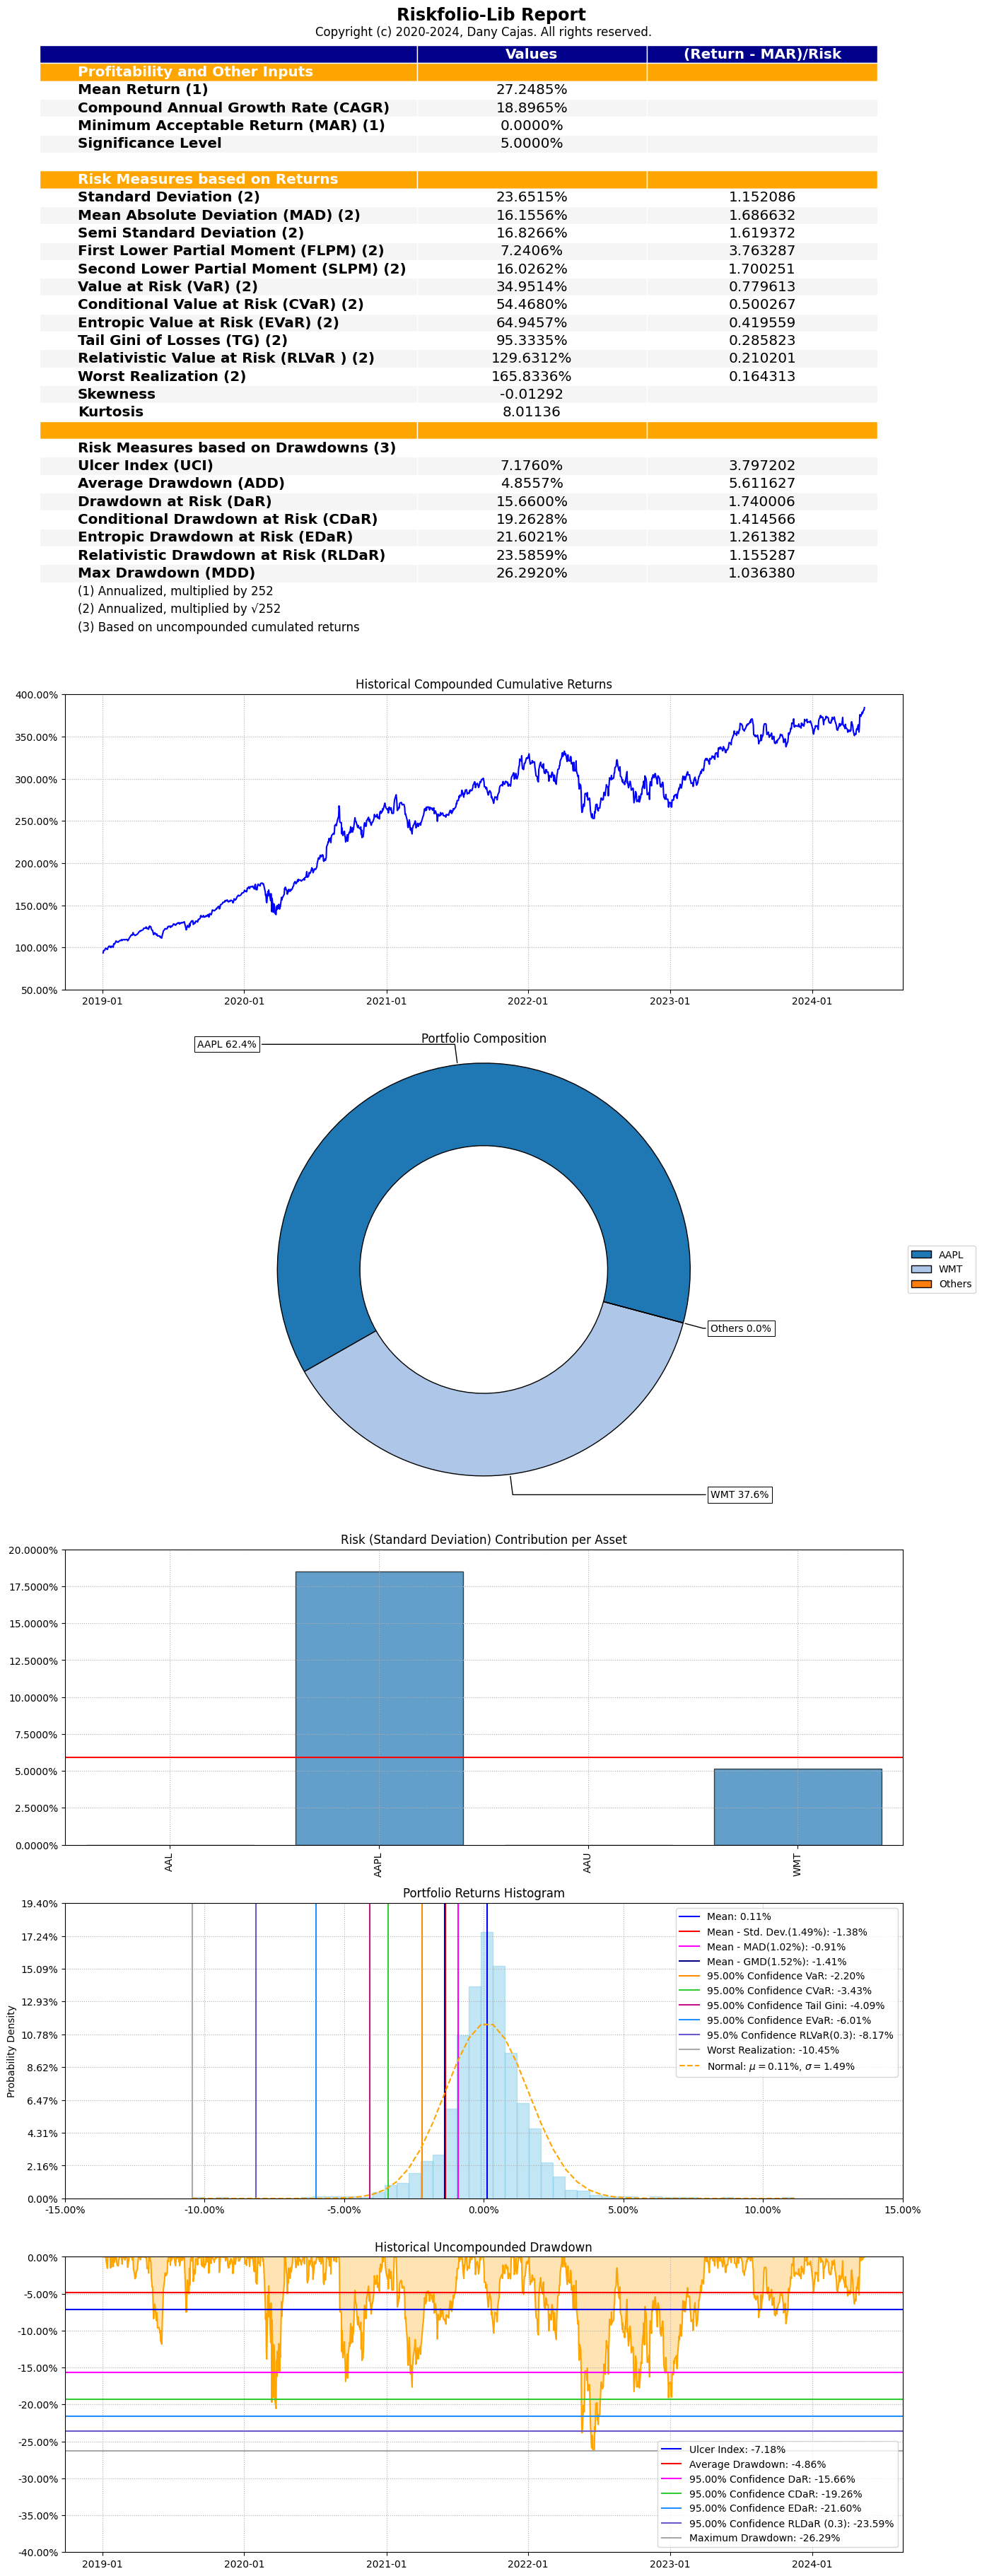

In [47]:
rp.Reports.jupyter_report(Y, w)

In [ ]:
rp.Reports.excel_report(
    Y,
    w,
    rf=0,
    alpha=0.05,
    t_factor=252,
    ini_days=1,
    days_per_year=252,
    name=r"C:\Users\L00616607\Developer\ProgFin\python port1.xlsx",
)


c:\Users\L00616607\Anaconda3\envs\progfin\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\L00616607\Anaconda3\envs\progfin\lib\site-packages\riskfolio\RiskFunctions.py:349: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
c:\Users\L00616607\Anaconda3\envs\progfin\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


c:\Users\L00616607\Anaconda3\envs\progfin\lib\site-packages\riskfolio\PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


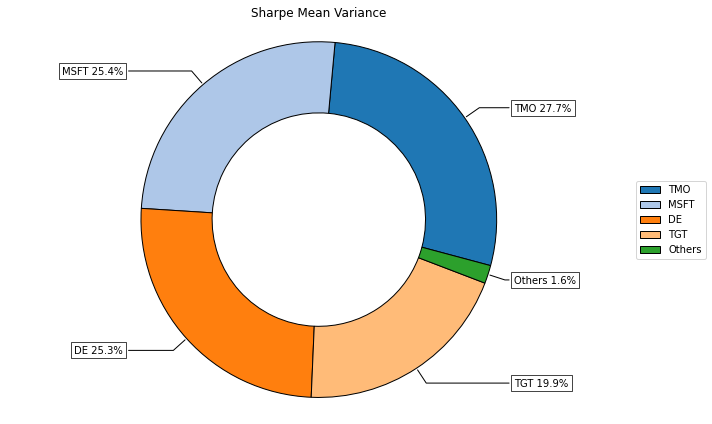

In [ ]:
# Ploting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=len(data.columns),
                cmap='tab20', height=6, width=10, ax=None)

In [ ]:
ann_mean_return = ((1 + Y.mean())**252)-1
print(ann_mean_return)

JCI      0.115933
TGT      0.275732
CMCSA    0.033294
CPB      0.092021
MO       0.027632
APA      0.271488
MMC      0.170360
JPM      0.109976
ZION     0.113081
PSA      0.125148
BAX      0.027283
BMY      0.084847
LUV     -0.021063
PCAR     0.112626
TXT      0.106032
TMO      0.249513
DE       0.289205
MSFT     0.290017
HPQ      0.130075
SEE      0.089473
VZ       0.017172
CNP      0.064804
NI       0.062508
T        0.009353
BA       0.011271
dtype: float64


In [ ]:
ann_stdev = Y.std() * (252**(1/2))
print(ann_stdev)

JCI      0.274580
TGT      0.331823
CMCSA    0.277959
CPB      0.276322
MO       0.255313
APA      0.652359
MMC      0.229482
JPM      0.298010
ZION     0.350642
PSA      0.240674
BAX      0.252858
BMY      0.240625
LUV      0.366004
PCAR     0.264575
TXT      0.362621
TMO      0.270296
DE       0.321626
MSFT     0.290609
HPQ      0.352056
SEE      0.322590
VZ       0.208137
CNP      0.298948
NI       0.263072
T        0.242315
BA       0.458942
dtype: float64


In [ ]:
Y.cov()

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
JCI,0.000299,0.000142,0.000149,0.000076,0.000116,0.000237,0.000149,0.000206,0.000207,0.000108,...,0.000128,0.000200,0.000155,0.000197,0.000178,0.000090,0.000153,0.000116,0.000129,0.000244
TGT,0.000142,0.000437,0.000135,0.000107,0.000116,0.000128,0.000135,0.000145,0.000139,0.000102,...,0.000141,0.000158,0.000172,0.000167,0.000126,0.000105,0.000113,0.000113,0.000113,0.000155
CMCSA,0.000149,0.000135,0.000307,0.000080,0.000113,0.000172,0.000131,0.000185,0.000173,0.000103,...,0.000112,0.000163,0.000172,0.000170,0.000140,0.000121,0.000148,0.000136,0.000152,0.000199
CPB,0.000076,0.000107,0.000080,0.000303,0.000106,-0.000016,0.000080,0.000064,0.000040,0.000102,...,0.000080,0.000051,0.000086,0.000050,0.000068,0.000106,0.000094,0.000106,0.000095,0.000016
MO,0.000116,0.000116,0.000113,0.000106,0.000259,0.000151,0.000099,0.000136,0.000133,0.000098,...,0.000080,0.000128,0.000095,0.000114,0.000115,0.000102,0.000118,0.000115,0.000120,0.000158
APA,0.000237,0.000128,0.000172,-0.000016,0.000151,0.001689,0.000161,0.000351,0.000402,0.000040,...,0.000105,0.000319,0.000180,0.000344,0.000227,0.000050,0.000237,0.000103,0.000166,0.000526
MMC,0.000149,0.000135,0.000131,0.000080,0.000099,0.000161,0.000209,0.000165,0.000136,0.000116,...,0.000146,0.000147,0.000167,0.000150,0.000137,0.000094,0.000153,0.000124,0.000109,0.000182
JPM,0.000206,0.000145,0.000185,0.000064,0.000136,0.000351,0.000165,0.000352,0.000328,0.000098,...,0.000120,0.000234,0.000177,0.000226,0.000201,0.000111,0.000190,0.000138,0.000163,0.000325
ZION,0.000207,0.000139,0.000173,0.000040,0.000133,0.000402,0.000136,0.000328,0.000488,0.000071,...,0.000081,0.000240,0.000130,0.000231,0.000192,0.000100,0.000173,0.000124,0.000162,0.000349
PSA,0.000108,0.000102,0.000103,0.000102,0.000098,0.000040,0.000116,0.000098,0.000071,0.000230,...,0.000104,0.000104,0.000119,0.000092,0.000107,0.000095,0.000142,0.000148,0.000093,0.000121


In [ ]:
w.round(4)

,weights
JCI,0.0000
TGT,0.1987
CMCSA,0.0000
CPB,0.0000
MO,0.0000
APA,0.0165
MMC,0.0000
JPM,0.0000
ZION,0.0000
PSA,0.0000


In [ ]:

#weight = np.full_like(ann_stdev,1/len(ann_stdev))
#weight

In [ ]:
portaf_ann_stdev = ((w.T @ Y.cov()) @ w) ** (1/2)
portaf_ann_stdev

,weights
weights,0.014544


In [ ]:
df = pd.DataFrame({"goog":goog.Close, "cemex":cemex.Close, 'mxn':mxn['Close']})
# drop rows where all columns in subset are NA
df = df.dropna(axis=0, how='all', subset=('goog', 'cemex'))
# fill with the value of the previous date's values
df = df.fillna(method='ffill')
# in case there are empty rows at the beginning, fill with following date's values
df = df.fillna(method='bfill')

In [ ]:
#Add a column with google prices in MXN
df['goog_mxn'] = df.goog * df.mxn

In [ ]:
df.plot(y=['goog_mxn', "cemex"])

In [ ]:
df.corr()

In [ ]:
df.cov()

In [ ]:
df.std()

In [ ]:
df.std() * np.sqrt(252)

In [ ]:
df['goog_mxn_change'] = df.goog_mxn.pct_change()

In [ ]:
df.to_excel('example.xlsx')